## Audio Data Augmentation Techniques

In [1]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

sample_submission.csv
train



In [2]:
#Import libraries

import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Loading the audio file
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data

#Plotting the audio data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

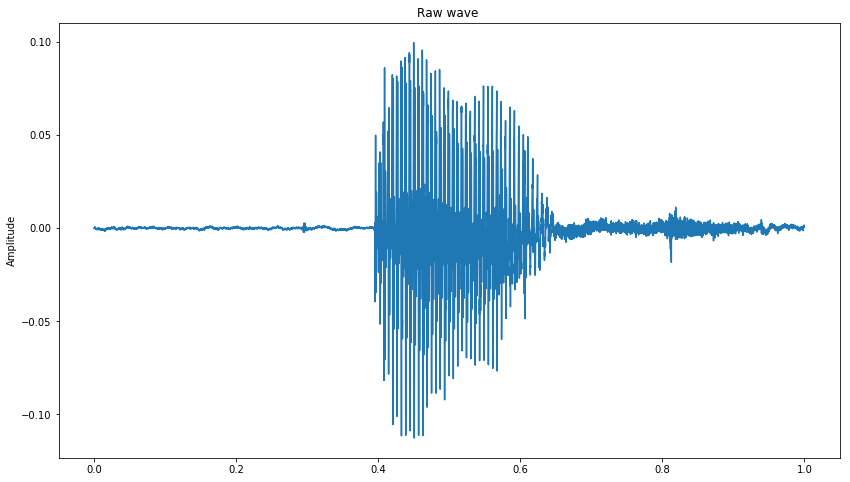

In [4]:
data = load_audio_file("../input/train/audio/off/1df483c0_nohash_0.wav")
plot_time_series(data)

In [5]:
#Hear it ! 
ipd.Audio(data, rate=16000)

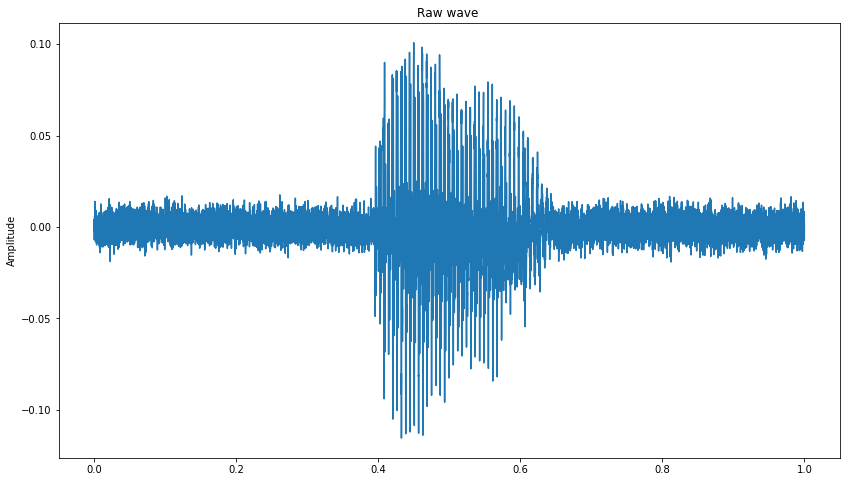

In [6]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# Limiting the amplitude of the noise so we can still hear the word even with the noise
ipd.Audio(data_wn, rate=16000)

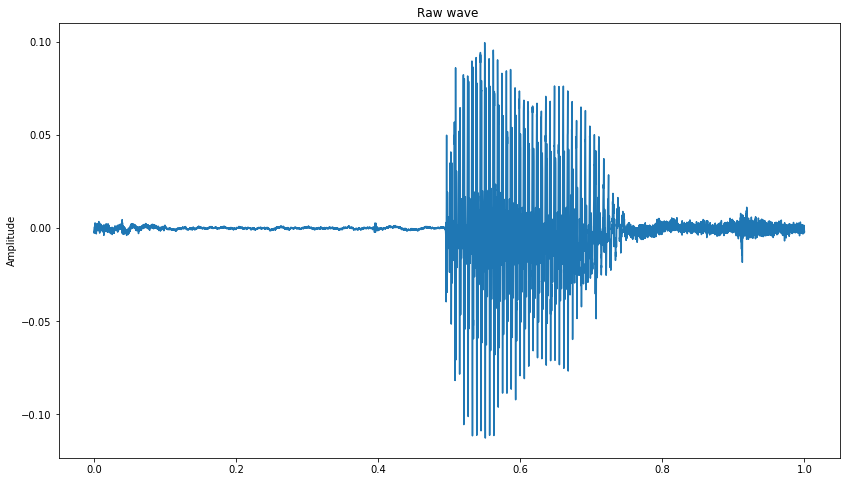

In [7]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear 'off' 


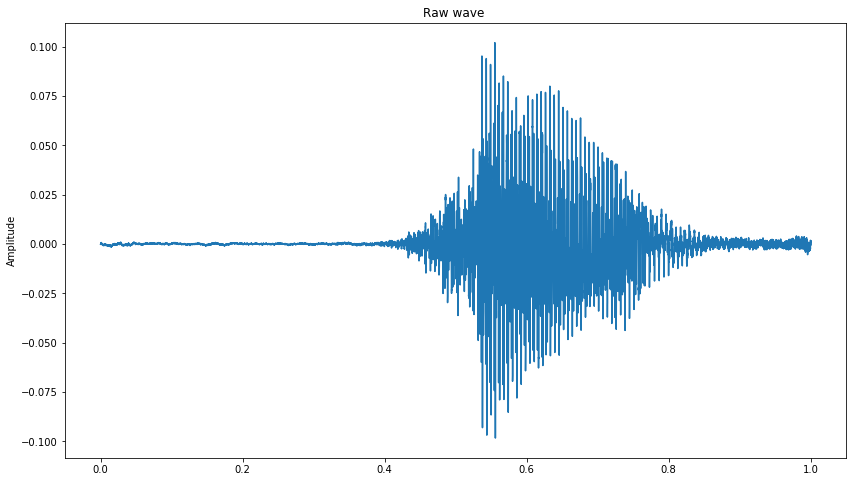

Higher frequencies  


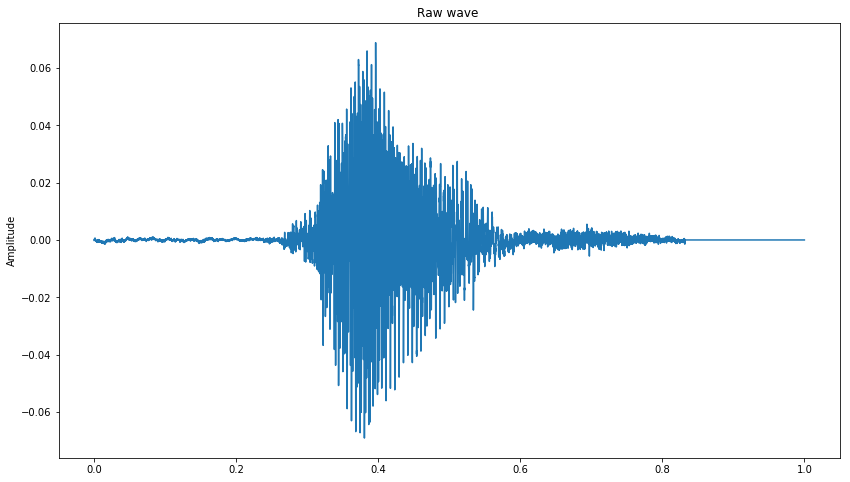

In [8]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear 'off' ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)